## Web scraper for grabbing jobs off of LinkedIn

In [ ]:
# Example URL: https://ch.linkedin.com/jobs/search?keywords=biology&location=Basel%2C%2BBasel%2C%2BSwitzerland&geoId=103383283&trk=public_jobs_jobs-search-bar_search-submit&currentJobId=2477384805&position=8&pageNum=5

In [171]:
keywords = "biology"
location_string = "Basel%2C%2BBasel%2C%2BSwitzerland"
geo_id = "103383283"
query_url = f"https://ch.linkedin.com/jobs/search?keywords={keywords}&location={location_string}&geoId={geo_id}"

In [172]:
import requests
from bs4 import BeautifulSoup as bs
import re

In [173]:
r = requests.get(query_url)

In [180]:
print(r.content[-8000:])

b'e-selector__item"role="menuitem"><button aria-label="\xc4\x8ce\xc5\xa1tina (Tschechisch)"data-tracking-control-name="language-selector-cs_CZ"class="language-selector__link"data-locale="cs_CZ"lang="cs_CZ">\xc4\x8ce\xc5\xa1tina (Tschechisch)</button></li><li aria-label="Dansk (D\xc3\xa4nisch)"class="language-selector__item"role="menuitem"><button aria-label="Dansk (D\xc3\xa4nisch)"data-tracking-control-name="language-selector-da_DK"class="language-selector__link"data-locale="da_DK"lang="da_DK">Dansk (D\xc3\xa4nisch)</button></li><li aria-label="Deutsch ausgew\xc3\xa4hlt"class="language-selector__item"role="menuitem"><button aria-label="Deutsch ausgew\xc3\xa4hlt"data-tracking-control-name="language-selector-de_DE"class="language-selector__link language-selector__link--selected"data-locale="de_DE"lang="de_DE"><strong>Deutsch</strong></button></li><li aria-label="English (Englisch)"class="language-selector__item"role="menuitem"><button aria-label="English (Englisch)"data-tracking-control-

In [8]:
soup = bs(r.content, 'html.parser')

In [18]:
soup.find_all('h3', {'class':'result-card__title'})

[<h3 class="result-card__title job-result-card__title">Research Assistant Cancer Biology (M/F) - Basel</h3>,
 <h3 class="result-card__title job-result-card__title">Research Scientist, Neuroscience Research (for 70% work)</h3>,
 <h3 class="result-card__title job-result-card__title">Internship for Life Science Students in Systems Biology</h3>,
 <h3 class="result-card__title job-result-card__title">Scientist</h3>,
 <h3 class="result-card__title job-result-card__title">Temporary Scientific Associate</h3>,
 <h3 class="result-card__title job-result-card__title">Junior Deviation Writer</h3>,
 <h3 class="result-card__title job-result-card__title">Scientist - R&amp;D</h3>,
 <h3 class="result-card__title job-result-card__title">Senior Researcher Molecular Biology (m/f)</h3>,
 <h3 class="result-card__title job-result-card__title">Scientist - R&amp;D</h3>,
 <h3 class="result-card__title job-result-card__title">Scientist Position - Mouse Developmental Biology</h3>,
 <h3 class="result-card__title jo

In [19]:
soup.find_all('div', {'class':'description__text'}) #only works on active JS element

[]

In [29]:
#soup.find_all('a', href=True)
soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)


[<a class="result-card__full-card-link" data-tracking-client-ingraph="" data-tracking-control-name="public_jobs_job-result-card_result-card_full-click" data-tracking-will-navigate="" href="https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&amp;trackingId=G4VvOt3EZPL59zm6AUT6Pw%3D%3D&amp;position=1&amp;pageNum=0&amp;trk=public_jobs_job-result-card_result-card_full-click"><span class="screen-reader-text">Research Assistant Cancer Biology (M/F) - Basel</span></a>,
 <a class="result-card__full-card-link" data-tracking-client-ingraph="" data-tracking-control-name="public_jobs_job-result-card_result-card_full-click" data-tracking-will-navigate="" href="https://ch.linkedin.com/jobs/view/research-scientist-neuroscience-research-for-70%25-work-at-novartis-institutes-for-biomedical-research-nibr-2520570671?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&amp;trackingId=cT92lbqhkO4RCUbPgIEJmw%3D%3D&amp;position=

In [69]:
soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)[0].attrs

{'class': ['result-card__full-card-link'],
 'href': 'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&trackingId=G4VvOt3EZPL59zm6AUT6Pw%3D%3D&position=1&pageNum=0&trk=public_jobs_job-result-card_result-card_full-click',
 'data-tracking-control-name': 'public_jobs_job-result-card_result-card_full-click',
 'data-tracking-client-ingraph': '',
 'data-tracking-will-navigate': ''}

In [41]:
{i.text:i['href'] for i in soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)}

{'Research Assistant Cancer Biology (M/F) - Basel': 'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&trackingId=G4VvOt3EZPL59zm6AUT6Pw%3D%3D&position=1&pageNum=0&trk=public_jobs_job-result-card_result-card_full-click',
 'Research Scientist, Neuroscience Research (for 70% work)': 'https://ch.linkedin.com/jobs/view/research-scientist-neuroscience-research-for-70%25-work-at-novartis-institutes-for-biomedical-research-nibr-2520570671?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&trackingId=cT92lbqhkO4RCUbPgIEJmw%3D%3D&position=2&pageNum=0&trk=public_jobs_job-result-card_result-card_full-click',
 'Internship for Life Science Students in Systems Biology': 'https://ch.linkedin.com/jobs/view/internship-for-life-science-students-in-systems-biology-at-roche-2503610433?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&trackingId=HyfhjHGdHVfngMLnoo3RYw%3D%3D&position=3&pageNum=0&trk=public_jobs_job-result-card_res

In [43]:
soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)[0]['href']

'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088?refId=cdb2fba3-0e7a-4d9c-97b3-984529e791db&trackingId=G4VvOt3EZPL59zm6AUT6Pw%3D%3D&position=1&pageNum=0&trk=public_jobs_job-result-card_result-card_full-click'

In [51]:
link = soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)[0]['href']
pattern = "(.*)\?refId(.*)"
match_obj = re.match(pattern=pattern, string=link)

cleaned_link = match_obj[1] #match_obj.groups()[0]

In [53]:
match_obj.groups()[0]

'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088'

In [55]:
get_clean_url = lambda x: re.match(pattern="(.*)\?refId(.*)", string=x).groups()[0]

### Final dict: job & job URL

In [56]:
{i.text:get_clean_url(i['href']) for i in soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)}

{'Research Assistant Cancer Biology (M/F) - Basel': 'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088',
 'Research Scientist, Neuroscience Research (for 70% work)': 'https://ch.linkedin.com/jobs/view/research-scientist-neuroscience-research-for-70%25-work-at-novartis-institutes-for-biomedical-research-nibr-2520570671',
 'Internship for Life Science Students in Systems Biology': 'https://ch.linkedin.com/jobs/view/internship-for-life-science-students-in-systems-biology-at-roche-2503610433',
 'Scientist': 'https://ch.linkedin.com/jobs/view/scientist-at-randstad-switzerland-2483664472',
 'Temporary Scientific Associate': 'https://ch.linkedin.com/jobs/view/temporary-scientific-associate-at-idorsia-pharmaceuticals-ltd-2490197636',
 'Junior Deviation Writer': 'https://ch.linkedin.com/jobs/view/junior-deviation-writer-at-thermo-fisher-scientific-2493208727',
 'Scientist - R&D': 'https://ch.linkedin.com/jobs/view/scientist-r-d-at-universal-job-

#### What can I get from each URL?

In [57]:
cleaned_link

'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088'

In [61]:
r_job = requests.get(cleaned_link)
soup_job = bs(r.content, 'html.parser')

In [71]:
soup_job.get_attribute_list('show-more-less-html__markup')

[None]

In [74]:
#.description__text
#show-more-less-html__markup
soup_job.find_all('div', {'class':'description__text'})

[]

In [81]:
soup_job.find_all('main')

[<main class="results results--two-pane" id="main-content" role="main"><div class="results__container results__container--two-pane"><section class="search-header"><div class="create-alert-modal-outlet__container create-alert-modal-outlet__container--toggle create-alert-modal-outlet__container--toggle-secondary"><div class="create-alert-modal-outlet__toggle-text" id="create-alert-modal-outlet-toggle-text"><div class="create-alert-modal-outlet__toggle-text-container"><span>Jobbenachrichtigungen aktivieren</span></div></div><div class="create-alert-modal-outlet__toggle" data-modal="create-alert-modal-outlet"><div class="toggle"><span class="hidden" id="toggle-public_jobs_create-alert-modal-outlet__toggle-description">Jobbenachrichtigungen aktivieren</span><input aria-describedby="toggle-public_jobs_create-alert-modal-outlet__toggle-description" class="toggle__checkbox" data-tracking-control-name="public_jobs_create-alert-modal-outlet__toggle" id="toggle-public_jobs_create-alert-modal-outl

In [80]:
print(soup_job.get_text())


267 Jobangebote für Biology in Basel, Basel, Schweiz (10 neu)LinkedIn und unsere Kunden, Partner und Dienstanbieter verwenden Cookies und ähnliche Technologien („Cookies“), um unsere Dienste bereitzustellen und zu schützen, um die Leistung der Dienste zu ermitteln und zu verbessern und um relevante Anzeigen (einschließlich Stellenanzeigen) auf und außerhalb von LinkedIn zu schalten. Weitere Informationen finden Sie in unserer  Cookie-Richtlinie.Wählen Sie „Cookies akzeptieren“, um dieser Nutzung zuzustimmen, oder legen Sie Ihre Cookie-Auswahl unter „Einstellungen verwalten“ fest. Sie können Ihre Cookie-Einstellungen jederzeit ändern und die Einwilligung in Ihren Einstellungen widerrufen.Einstellungen verwaltenCookies akzeptierenDiese Website verwendet Cookies, um unseren Service zu verbessern und Ihnen relevante Anzeigen zu präsentieren. Mit der Nutzung dieser Website stimmen Sie der Verwendung von Cookies zu. Lesen Sie die LinkedIn Cookie-Richtlinie.dismissWeiter zum HauptinhaltLinke

Clearly need JS for this

In [170]:
from WebScraper import *

# get latest chromedriver for ARM from https://github.com/electron/electron/releases

#from os.path import abspath
#import chromedriver_binary
#chromedriver_binary.chromedriver_filename


In [181]:
#chrome_driver_path = "chromedriver-v12.0.5-linux-armv7l"

#driver = initiate_driver(chrome_driver = chrome_driver_path)
#url = "https://www.coop.ch/de/unternehmen/standorte-und-oeffnungszeiten.retail.html"
#driver.get(url)
#driver.find_element_by_xpath("/html/body/div[3]/main/div[2]/div/div/div[1]/div[1]/div[1]")
chrome_driver_path = "chromedrivers/chromedriver_linux_arm64/chromedriver"#chromedriver_binary.chromedriver_filename
driver = initiate_driver(headless=False, chrome_driver = chrome_driver_path)

In [182]:
# from selenium import webdriver
# webdriver.Chrome("chromedrivers/chromedriver_linux_arm64/chromedriver")
# webdriver.Chrome()
driver.get("https://www.linkedin.com/jobs/search/?keywords=biology&location=Basel%2C%2BBasel%2C%2BSwitzerland&geoId=103383283&originalSubdomain=ch")
#driver.find_element_by_xpath("/html/body/div[7]/div[3]/div[3]/div/div/section[1]/div/div/section/div/ul/li[1]/button")
#driver.switch_to.frame('main2')
#driver.find_elements_by_css_selector("[aria-label='Page 2']")

In [199]:
driver.find_elements_by_class_name("result-card__full-card-link")[0].get_attribute('href')

'https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088?refId=e5aVp3LtrCm7HrHDU2HQpg%3D%3D&trackingId=cuKK8z7HVKws5Hz99RMkYg%3D%3D&position=1&pageNum=0&trk=public_jobs_job-result-card_result-card_full-click'

In [164]:
driver.find_elements_by_xpath("//button[contains(@class,'infinite-scroller__show-more-button')]")[0].text == "See more jobs"

True

In [153]:
#divs = driver.find_elements_by_css_selector('div')
driver.find_elements_by_xpath("//button[contains(@class,'infinite-scroller__show-more-button')]")[0].click()
#driver.quit()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=90.0.4430.85)


In [165]:
import time

SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    if driver.find_element_by_class_name("inline-notification__text").text == "You've viewed all jobs for this search":
        break
    if driver.find_elements_by_xpath("//button[contains(@class,'infinite-scroller__show-more-button')]")[0].text == "See more jobs":
        driver.find_elements_by_xpath("//button[contains(@class,'infinite-scroller__show-more-button')]")[0].click()
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

True

In [140]:
driver.quit()

In [ ]:
driver.get('https://ch.linkedin.com/jobs/view/research-assistant-cancer-biology-m-f-basel-at-basilea-2507937088')

In [16]:
driver.find_element_by_class_name("show-more-less-html__markup").text

Your tasks
Maintenance and running of a cell biology lab
Organization and coordination of research activities
Development and implementation of biochemical, cell and tumor biology assays
Responsible for tumor cell cultures
Testing novel compounds and analyzing results
Compound mechanism of action and target-validation studies
Preparing method and data summaries
Analysis of biological data and reporting in the Basilea lab notebook system and group meetings
Your profile
Master in a biological science (or equivalent technician training)
Minimum 3 years’ experience in research, preferably in pharma industry and in oncology
Extensive tumor cell culture and cell biology experience as well as a broad biochemical technique background
Very good language skills: fluent in English, spoken and written, any other language is considered beneficial
Ability to work both independently and collaboratively in a team environment
Good knowledge of standard programs for data analysis and presentation
Apply 

In [14]:
driver.find_element_by_class_name("description").text

'Your tasks\nMaintenance and running of a cell biology lab\nOrganization and coordination of research activities\nDevelopment and implementation of biochemical, cell and tumor biology assays\nResponsible for tumor cell cultures\nTesting novel compounds and analyzing results\nCompound mechanism of action and target-validation studies\nPreparing method and data summaries\nAnalysis of biological data and reporting in the Basilea lab notebook system and group meetings\nYour profile\nMaster in a biological science (or equivalent technician training)\nMinimum 3 years’ experience in research, preferably in pharma industry and in oncology\nExtensive tumor cell culture and cell biology experience as well as a broad biochemical technique background\nVery good language skills: fluent in English, spoken and written, any other language is considered beneficial\nAbility to work both independently and collaboratively in a team environment\nGood knowledge of standard programs for data analysis and pre

In [13]:
driver.find_element_by_class_name("show-more-less-html__button").click()
print(driver.find_element_by_class_name("show-more-less-html__markup").text)

## Put it all together

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re

from WebScraper import *

In [2]:
def DEPRECATED_get_urls_linkedin(keywords = "biology",
                      location_string = "Basel%2C%2BBasel%2C%2BSwitzerland",
                      geo_id = "103383283"):
    
    query_url = f"https://ch.linkedin.com/jobs/search?keywords={keywords}&location={location_string}&geoId={geo_id}"
    
    r = requests.get(query_url)
    soup = bs(r.content, 'html.parser')
    
    get_clean_url = lambda x: re.match(pattern="(.*)\?refId(.*)", string=x).groups()[0]
    
    #for job in soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)
    jobs = [JobPosting(title=job.text, url = get_clean_url(job['href'])) for job in soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)]
    return jobs


def get_urls_linkedin(keywords = "biology",
                      location_string = "Basel%2C%2BBasel%2C%2BSwitzerland",
                      geo_id = "103383283"):
    
    query_url = f"https://ch.linkedin.com/jobs/search?keywords={keywords}&location={location_string}&geoId={geo_id}"
    
    r = requests.get(query_url)
    soup = bs(r.content, 'html.parser')
    
    get_clean_url = lambda x: re.match(pattern="(.*)\?refId(.*)", string=x).groups()[0]
    
    #for job in soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)
    return soup.find_all('a', {'class':"result-card__full-card-link"}, href=True)


def get_description_linkedin(url):
    chrome_driver_path = "chromedrivers/chromedriver_linux_arm64/chromedriver"#chromedriver_binary.chromedriver_filename
    driver = initiate_driver(headless=True, chrome_driver = chrome_driver_path)
    driver.get(url)
    driver.find_element_by_class_name("show-more-less-html__button").click()
    description = driver.find_element_by_class_name("show-more-less-html__markup").text
    return description
    

def get_listings(listing_urls):
    get_clean_url = lambda x: re.match(pattern="(.*)\?refId(.*)", string=x).groups()[0]
    
    jobs = [JobPosting(title=job.text, url = get_clean_url(job['href'])) for job in listing_urls]
    return jobs

In [3]:
class JobPosting:
    chrome_driver_path = "chromedrivers/chromedriver_linux_arm64/chromedriver"
    driver = initiate_driver(headless=True, chrome_driver = chrome_driver_path, wait = 20)
    length = 0

    def __init__(self, title, url):
        self.title = title
        self.url = url
        
        self.description = None
        self.company = None
        self.apply_url = None
        self.requirements = []
        self.site = None
        
        JobPosting.length += 1
        self.id = JobPosting.length
        self.init_description()
        
    @staticmethod
    def get_description_linkedin(url, driver):
        #chrome_driver_path = "chromedrivers/chromedriver_linux_arm64/chromedriver"#chromedriver_binary.chromedriver_filename
        #driver = initiate_driver(headless=True, chrome_driver = chrome_driver_path, wait = 20)
        
        try:
            driver.get(url)
            #driver.implicitly_wait(10)
            button = driver.find_element_by_xpath("/html/body/main/section[1]/section[3]/div/section/button[1]")
            #driver.find_element_by_class_name("show-more-less-html__button").click()
            button.click()
            description = driver.find_element_by_class_name("show-more-less-html__markup").text
        except Exception as e:
            print("FAIL:\t", e)
            print(url)
            pass
        #lse:
            #driver.quit()
        return description

    #@classmethod
    def init_description(self):
        #print(self.title)
        self.description = JobPosting.get_description_linkedin(self.url, JobPosting.driver)
        print(self.id)
    
    def set_description(self, description):
        self.description = description
    
    def get_description(self):
        print(self.description)
        return self.description

    def set_company(self, company):
        self.company = company
       
    def get_company(self):
        print(self.company)
        return self.company
    
    def set_apply_url(self, apply_url):
        self.apply_url = apply_url
      
    def get_apply_url(self):
        print(self.apply_url)
        return self.apply_url
    
    def set_requirements(self, requirements):
        self.requirements = requirements
    
    def add_requirement(self, requirement):
        self.requirements.append(requirement)
        
    def get_description(self):
        print(self.requirements)
        return self.requirements

In [4]:
jobs_list = get_urls_linkedin()

In [5]:
jobs_objs_list = get_listings(jobs_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [10]:
for job in jobs_objs_list:
    print(job.title,job.description, sep="\n\n")
    print("***********************************************************\n\n")

Research Assistant Cancer Biology (M/F) - Basel

Your tasks
Maintenance and running of a cell biology lab
Organization and coordination of research activities
Development and implementation of biochemical, cell and tumor biology assays
Responsible for tumor cell cultures
Testing novel compounds and analyzing results
Compound mechanism of action and target-validation studies
Preparing method and data summaries
Analysis of biological data and reporting in the Basilea lab notebook system and group meetings
Your profile
Master in a biological science (or equivalent technician training)
Minimum 3 years’ experience in research, preferably in pharma industry and in oncology
Extensive tumor cell culture and cell biology experience as well as a broad biochemical technique background
Very good language skills: fluent in English, spoken and written, any other language is considered beneficial
Ability to work both independently and collaboratively in a team environment
Good knowledge of standard p

## Analyze job descriptions with NLP

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b

In [11]:
import nltk
#nltk.download('punkt')


import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize# Passing the string text into word tokenize for breaking the sentences

In [12]:
example_desc = jobs_objs_list[0].description

In [32]:
token = word_tokenize(example_desc)
token

['Your',
 'tasks',
 'Maintenance',
 'and',
 'running',
 'of',
 'a',
 'cell',
 'biology',
 'lab',
 'Organization',
 'and',
 'coordination',
 'of',
 'research',
 'activities',
 'Development',
 'and',
 'implementation',
 'of',
 'biochemical',
 ',',
 'cell',
 'and',
 'tumor',
 'biology',
 'assays',
 'Responsible',
 'for',
 'tumor',
 'cell',
 'cultures',
 'Testing',
 'novel',
 'compounds',
 'and',
 'analyzing',
 'results',
 'Compound',
 'mechanism',
 'of',
 'action',
 'and',
 'target-validation',
 'studies',
 'Preparing',
 'method',
 'and',
 'data',
 'summaries',
 'Analysis',
 'of',
 'biological',
 'data',
 'and',
 'reporting',
 'in',
 'the',
 'Basilea',
 'lab',
 'notebook',
 'system',
 'and',
 'group',
 'meetings',
 'Your',
 'profile',
 'Master',
 'in',
 'a',
 'biological',
 'science',
 '(',
 'or',
 'equivalent',
 'technician',
 'training',
 ')',
 'Minimum',
 '3',
 'years',
 '’',
 'experience',
 'in',
 'research',
 ',',
 'preferably',
 'in',
 'pharma',
 'industry',
 'and',
 'in',
 'oncolog

In [17]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'and': 19, 'of': 11, 'in': 9, ',': 8, 'a': 6, 'cell': 5, 'the': 5, 'for': 4, 'to': 4, 'biology': 3, ...})

In [18]:
fdist.most_common(10)

[('and', 19),
 ('of', 11),
 ('in', 9),
 (',', 8),
 ('a', 6),
 ('cell', 5),
 ('the', 5),
 ('for', 4),
 ('to', 4),
 ('biology', 3)]

In [28]:
# importing stopwors from nltk library
#from nltk import word_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')

a = set(stopwords.words("english"))
text = example_desc
text1 = word_tokenize(text.lower())
#print(text1)

stopwords = [x for x in text1 if x not in a]
#print(stopwords)
stopwords

['tasks',
 'maintenance',
 'running',
 'cell',
 'biology',
 'lab',
 'organization',
 'coordination',
 'research',
 'activities',
 'development',
 'implementation',
 'biochemical',
 ',',
 'cell',
 'tumor',
 'biology',
 'assays',
 'responsible',
 'tumor',
 'cell',
 'cultures',
 'testing',
 'novel',
 'compounds',
 'analyzing',
 'results',
 'compound',
 'mechanism',
 'action',
 'target-validation',
 'studies',
 'preparing',
 'method',
 'data',
 'summaries',
 'analysis',
 'biological',
 'data',
 'reporting',
 'basilea',
 'lab',
 'notebook',
 'system',
 'group',
 'meetings',
 'profile',
 'master',
 'biological',
 'science',
 '(',
 'equivalent',
 'technician',
 'training',
 ')',
 'minimum',
 '3',
 'years',
 '’',
 'experience',
 'research',
 ',',
 'preferably',
 'pharma',
 'industry',
 'oncology',
 'extensive',
 'tumor',
 'cell',
 'culture',
 'cell',
 'biology',
 'experience',
 'well',
 'broad',
 'biochemical',
 'technique',
 'background',
 'good',
 'language',
 'skills',
 ':',
 'fluent',
 'en

In [33]:
#nltk.download('averaged_perceptron_tagger')

for tk in token:
    print(nltk.pos_tag([tk]))

[('Your', 'PRP$')]
[('tasks', 'NNS')]
[('Maintenance', 'NN')]
[('and', 'CC')]
[('running', 'VBG')]
[('of', 'IN')]
[('a', 'DT')]
[('cell', 'NN')]
[('biology', 'NN')]
[('lab', 'NN')]
[('Organization', 'NN')]
[('and', 'CC')]
[('coordination', 'NN')]
[('of', 'IN')]
[('research', 'NN')]
[('activities', 'NNS')]
[('Development', 'NNP')]
[('and', 'CC')]
[('implementation', 'NN')]
[('of', 'IN')]
[('biochemical', 'JJ')]
[(',', ',')]
[('cell', 'NN')]
[('and', 'CC')]
[('tumor', 'NN')]
[('biology', 'NN')]
[('assays', 'NNS')]
[('Responsible', 'JJ')]
[('for', 'IN')]
[('tumor', 'NN')]
[('cell', 'NN')]
[('cultures', 'NNS')]
[('Testing', 'VBG')]
[('novel', 'NN')]
[('compounds', 'NNS')]
[('and', 'CC')]
[('analyzing', 'VBG')]
[('results', 'NNS')]
[('Compound', 'NN')]
[('mechanism', 'NN')]
[('of', 'IN')]
[('action', 'NN')]
[('and', 'CC')]
[('target-validation', 'NN')]
[('studies', 'NNS')]
[('Preparing', 'VBG')]
[('method', 'NN')]
[('and', 'CC')]
[('data', 'NNS')]
[('summaries', 'NNS')]
[('Analysis', 'NN')]

In [36]:
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S
  Your/PRP$
  tasks/NNS
  Maintenance/NNP
  and/CC
  (NP running/NN)
  of/IN
  (NP a/DT cell/NN)
  (NP biology/NN)
  (NP lab/NN)
  Organization/NNP
  and/CC
  (NP coordination/NN)
  of/IN
  (NP research/NN)
  activities/NNS
  Development/NNP
  and/CC
  (NP implementation/NN)
  of/IN
  biochemical/JJ
  ,/,
  (NP cell/NN)
  and/CC
  (NP tumor/NN)
  (NP biology/NN)
  assays/VBZ
  Responsible/NNP
  for/IN
  (NP tumor/NN)
  (NP cell/NN)
  cultures/NNS
  Testing/VBG
  novel/JJ
  compounds/NNS
  and/CC
  analyzing/VBG
  results/NNS
  Compound/NNP
  (NP mechanism/NN)
  of/IN
  (NP action/NN)
  and/CC
  (NP target-validation/NN)
  studies/NNS
  Preparing/VBG
  (NP method/NN)
  and/CC
  (NP data/NN)
  summaries/NNS
  Analysis/NNP
  of/IN
  biological/JJ
  data/NNS
  and/CC
  (NP reporting/NN)
  in/IN
  the/DT
  Basilea/NNP
  (NP lab/NN)
  (NP notebook/NN)
  (NP system/NN)
  and/CC
  (NP group/NN)
  meetings/NNS
  Your/VBP
  profile/JJ
  Master/NNP
  in/IN
  (NP a/DT biological/JJ science/NN)


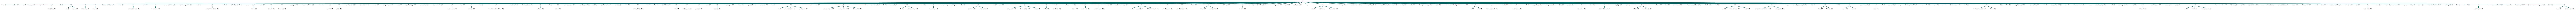

In [37]:
result

Check:
    
https://www.kaggle.com/chadalee/text-analytics-explained-job-description-data

In [42]:
FreqDist(stopwords)

FreqDist({',': 8, 'cell': 5, 'biology': 3, 'tumor': 3, 'data': 3, '.': 3, 'lab': 2, 'research': 2, 'activities': 2, 'biochemical': 2, ...})

In [43]:
example_desc

'Your tasks\nMaintenance and running of a cell biology lab\nOrganization and coordination of research activities\nDevelopment and implementation of biochemical, cell and tumor biology assays\nResponsible for tumor cell cultures\nTesting novel compounds and analyzing results\nCompound mechanism of action and target-validation studies\nPreparing method and data summaries\nAnalysis of biological data and reporting in the Basilea lab notebook system and group meetings\nYour profile\nMaster in a biological science (or equivalent technician training)\nMinimum 3 years’ experience in research, preferably in pharma industry and in oncology\nExtensive tumor cell culture and cell biology experience as well as a broad biochemical technique background\nVery good language skills: fluent in English, spoken and written, any other language is considered beneficial\nAbility to work both independently and collaboratively in a team environment\nGood knowledge of standard programs for data analysis and pre

In [61]:
import spacy
from spacy_langdetect import LanguageDetector

from spacy.language import Language

In [62]:
#python -m spacy download en_core_web_sm

In [65]:
nlp = spacy.load("en_core_web_sm")
def create_lang_detector(nlp, name):
    return LanguageDetector()

#Language.factory("language_detector", func=create_lang_detector)

#nlp = en_core_sci_lg.load(disable=["tagger", "ner"])
nlp.max_length = 2000000
nlp.add_pipe('language_detector', last=True)
doc = nlp(example_desc)

In [75]:
german_test = """Im Bereich «Synthetic Molecules Technical Development Basel» unterstützen Sie die «Hyphenated & Special Technology Sektion» durch:
    Berufserfahrung in GC-MS, LC-MS oder ICP-MS Analytik (Forschung, Entwicklung und/oder Qualitätskontrolle)
    Entsprechende GMP-Kenntnisse und Erfahrung bei deren Umsetzung sind erwünscht
    Engagiertes Mitdenken, Einbringen von Ideen und die aktive Mitarbeit im Team sowie Kommunikation mit den verschiedenen Schnittstellen
    Flair für IT-Applikationen (Access, Excel, Word, etc.) und digitale Themen
    Sehr gute Deutsch- und Englischkenntnisse in Wort und Schrift

Persönliche Anforderungen

    Selbständiges und genaues Arbeiten
    Pragmatischer, initiativer und zielorientierter Arbeitsstil
    Offene, neugierige und teamorientierte Persönlichkeit
    Fähigkeit zur Zusammenarbeit mit verschiedenen Fachstellen auf unterschiedlichen hierarchischen Ebenen.

Arbeitszeiten

Normalarbeitszeiten 08:00 ? 12:00 und 13:00 ? 17:00 Uhr

Fühlen Sie sich angesprochen und haben wir Ihr Interesse geweckt? Dann freuen wir uns über die elektronische Zustellung Ihrer vollständigen Bewerbungsunterlagen (Lebenslauf, Zeugnisse, Diplomas) an: mariam.adam@randstad.ch"""

In [76]:
print(doc._.language)
print(nlp(german_test)._.language)

{'language': 'en', 'score': 0.9999959151421488}
{'language': 'de', 'score': 0.9999961055662748}
